In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
import seaborn as sns
import string
import warnings
import os
import re
from datetime import datetime
from jqi_functions import *
import plotly.express as px
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [182]:
data = pd.read_csv('high_wage_outputs_v2_with_emp_counts.csv')

In [183]:
county_info = pd.read_csv('data/county_to_regions_key - Sheet1.csv')

In [184]:
cost_of_living = pd.read_csv('data/united-way-col-1A1PS1C2019.csv') # 1 adult, 1 preschooler, 1 child

In [185]:
data = pd.merge(data, county_info, on='County')

In [187]:
data = data[['Industry', 'Date', 'County', 'CDI Regions', 'Rural/Urban', 'Population', 'High Wage Count', 'Employment Count', 'Cost of Living']]

In [188]:
data['Population'] = normalize_titles(data['Population']).astype(int)

In [189]:
data.head()

,Industry,Date,County,CDI Regions,Rural/Urban,Population,High Wage Count,Employment Count,Cost of Living
0,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,43000.0,80216
1,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,43000.0,80216
2,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,47400.0,80216
3,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,47400.0,80216
4,accounting tax preparation bookkeeping and pay...,2019-03-01,Los Angeles,Los Angeles,Urban,10081570,9517,48200.0,80216


### Histogram of wages by industry

In [10]:
ca_ipums = cleaned_ipums('2019')

In [11]:
ca_ipums_wages = ca_ipums.groupby(by=['Main_Code']).mean()

In [12]:
ca_ipums_wages_regions = pd.merge(ca_ipums, county_info, on='COUNTYFIP').groupby(by=['CDI Regions']).mean()

In [13]:
ca_ipums_minelog = ca_ipums.loc[ca_ipums['Main_Code'] == 100]
ca_ipums_farm = ca_ipums.loc[ca_ipums['Main_Code'] == 111]
ca_ipums_const = ca_ipums.loc[ca_ipums['Main_Code'] == 230]
ca_ipums_manu = ca_ipums.loc[ca_ipums['Main_Code'] == 300]
ca_ipums_ttu = ca_ipums.loc[ca_ipums['Main_Code'] == 400]
ca_ipums_info = ca_ipums.loc[ca_ipums['Main_Code'] == 500]
ca_ipums_fin = ca_ipums.loc[ca_ipums['Main_Code'] == 520]
ca_ipums_prof = ca_ipums.loc[ca_ipums['Main_Code'] == 540]
ca_ipums_eduhealth = ca_ipums.loc[ca_ipums['Main_Code'] == 600]
ca_ipums_leisure = ca_ipums.loc[ca_ipums['Main_Code'] == 700]
ca_ipums_other = ca_ipums.loc[ca_ipums['Main_Code'] == 800]
ca_ipums_gov = ca_ipums.loc[ca_ipums['Main_Code'] == 900]

In [14]:
main_ind_dfs = [ca_ipums_minelog, ca_ipums_farm, ca_ipums_const, ca_ipums_manu, ca_ipums_ttu, ca_ipums_info, ca_ipums_fin, ca_ipums_prof, ca_ipums_eduhealth, ca_ipums_leisure, ca_ipums_other, ca_ipums_gov]

In [15]:
main_ind_titles = ['Mining & Logging', 'Total Farm', 'Construction', 'Manufacturing', 'Trade, Transportation, & Utilities', 'Information', 'Financial Activities', 'Professional & Business Services', 'Educational & Health Services', 'Leisure & Hospitality', 'Other Services', 'Government']

In [16]:
def plot_hist(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Average Wage Per Industry', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

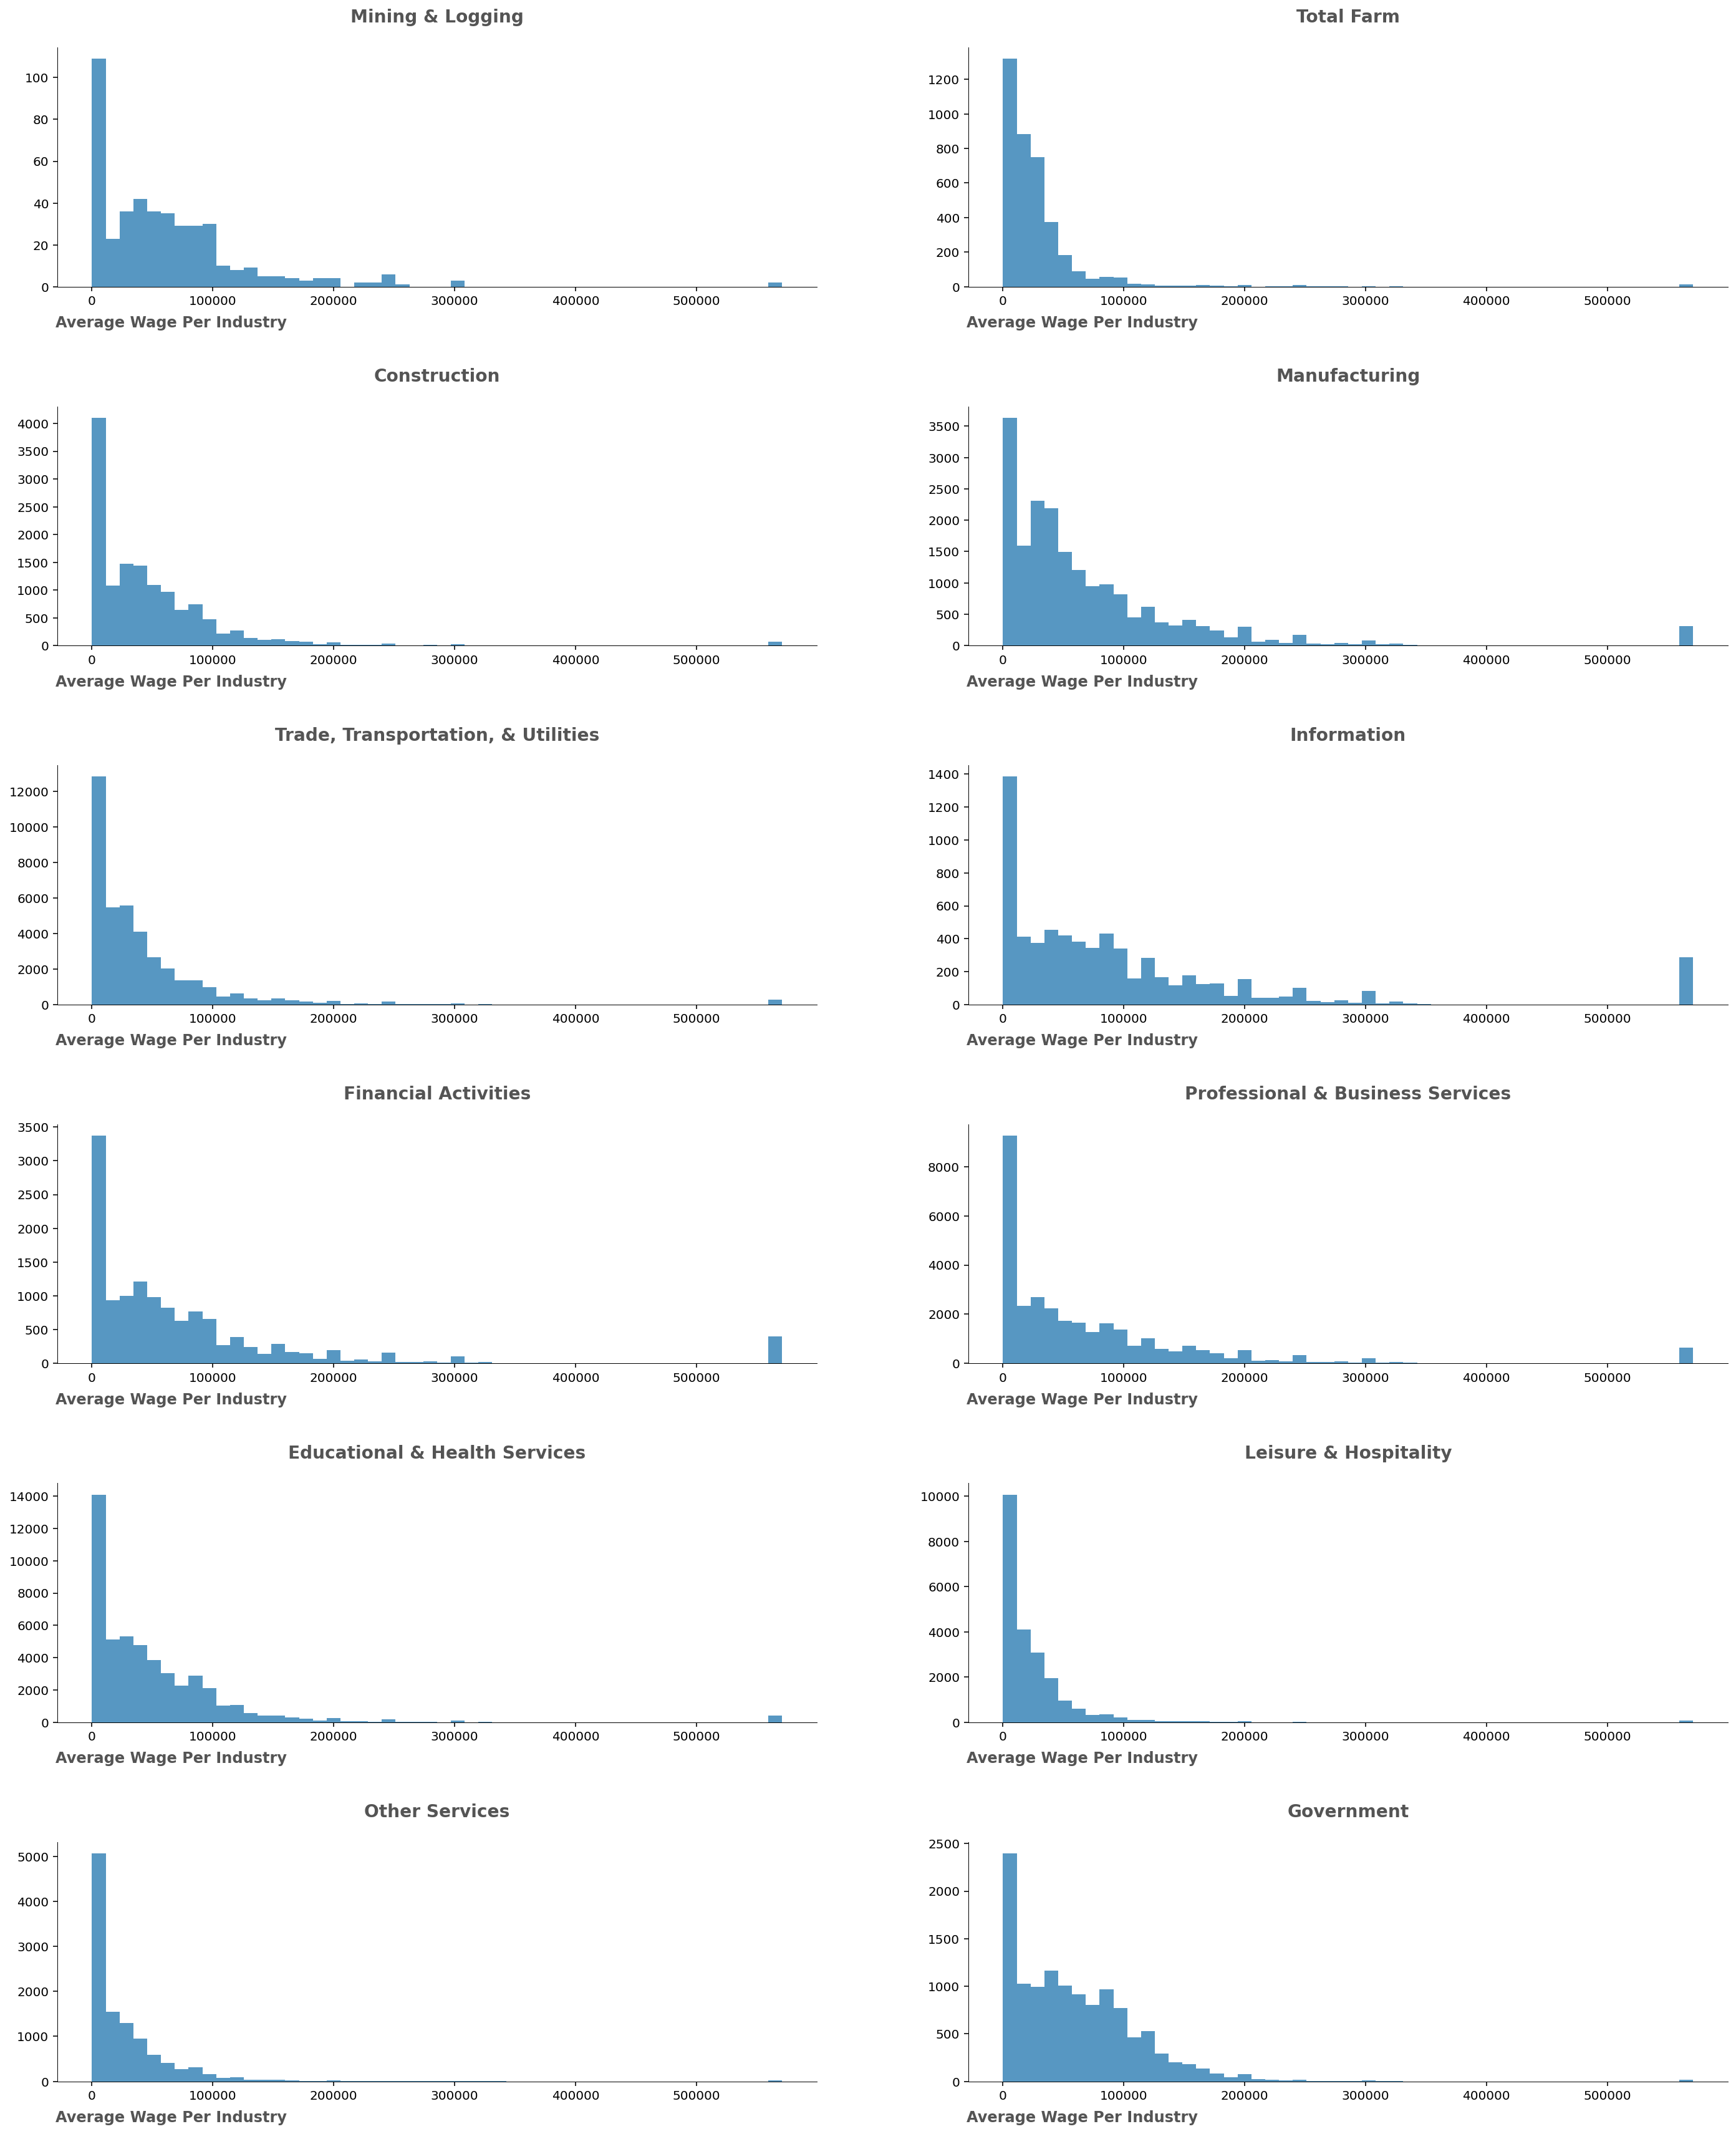

In [17]:
plot_hist(main_ind_dfs, main_ind_titles)

#### Again, but clipping lower numbers (removing all wages = 0)

In [101]:
ca_ipums_minelog_clip = ca_ipums_minelog.loc[ca_ipums_minelog['INCWAGE'] > 0]
ca_ipums_farm_clip = ca_ipums_farm.loc[ca_ipums_farm['INCWAGE'] > 0]
ca_ipums_const_clip = ca_ipums_const.loc[ca_ipums_const['INCWAGE'] > 0]
ca_ipums_manu_clip = ca_ipums_manu.loc[ca_ipums_manu['INCWAGE'] > 0]
ca_ipums_ttu_clip = ca_ipums_ttu.loc[ca_ipums_ttu['INCWAGE'] > 0]
ca_ipums_info_clip = ca_ipums_info.loc[ca_ipums_info['INCWAGE'] > 0]
ca_ipums_fin_clip = ca_ipums_fin.loc[ca_ipums_fin['INCWAGE'] > 0]
ca_ipums_prof_clip = ca_ipums_prof.loc[ca_ipums_prof['INCWAGE'] > 0]
ca_ipums_eduhealth_clip = ca_ipums_eduhealth.loc[ca_ipums_eduhealth['INCWAGE'] > 0]
ca_ipums_leisure_clip = ca_ipums_leisure.loc[ca_ipums_leisure['INCWAGE'] > 0]
ca_ipums_other_clip = ca_ipums_other.loc[ca_ipums_other['INCWAGE'] > 0]
ca_ipums_gov_clip = ca_ipums_gov.loc[ca_ipums_gov['INCWAGE'] > 0]
main_ind_dfs_clip = [ca_ipums_minelog_clip, ca_ipums_farm_clip, ca_ipums_const_clip, ca_ipums_manu_clip,
                    ca_ipums_ttu_clip, ca_ipums_info_clip, ca_ipums_fin_clip, ca_ipums_prof_clip, ca_ipums_eduhealth_clip,
                    ca_ipums_leisure_clip, ca_ipums_other_clip, ca_ipums_gov_clip]

In [102]:
def plot_hist_clipped(df_lists, titles):
    fig, ax = plt.subplots(6, 2, figsize=(24,30))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
    n_col = 0
    n_row = 0
    for i in range(len(df_lists)):
        ax[n_row, n_col].hist(df_lists[i]['INCWAGE'], bins=50, color='#5797c2')
        ax[n_row, n_col].set_title(titles[i], fontsize=14, weight='bold', pad=20, color='#545454')
        ax[n_row, n_col].set_xlabel('Average Wage Per Industry', fontsize=12, weight='bold', color = '#545454')
        ax[n_row, n_col].xaxis.set_label_coords(0.15, -0.12)
        ax[n_row, n_col].spines['top'].set_visible(False)
        ax[n_row, n_col].spines['right'].set_visible(False)
        ax[n_row, n_col].spines['bottom'].set_linewidth(0.5)
        ax[n_row, n_col].spines['left'].set_linewidth(0.5)
        n_col += 1
        if n_col == 2:
            n_col = 0
            n_row += 1
    plt.show()

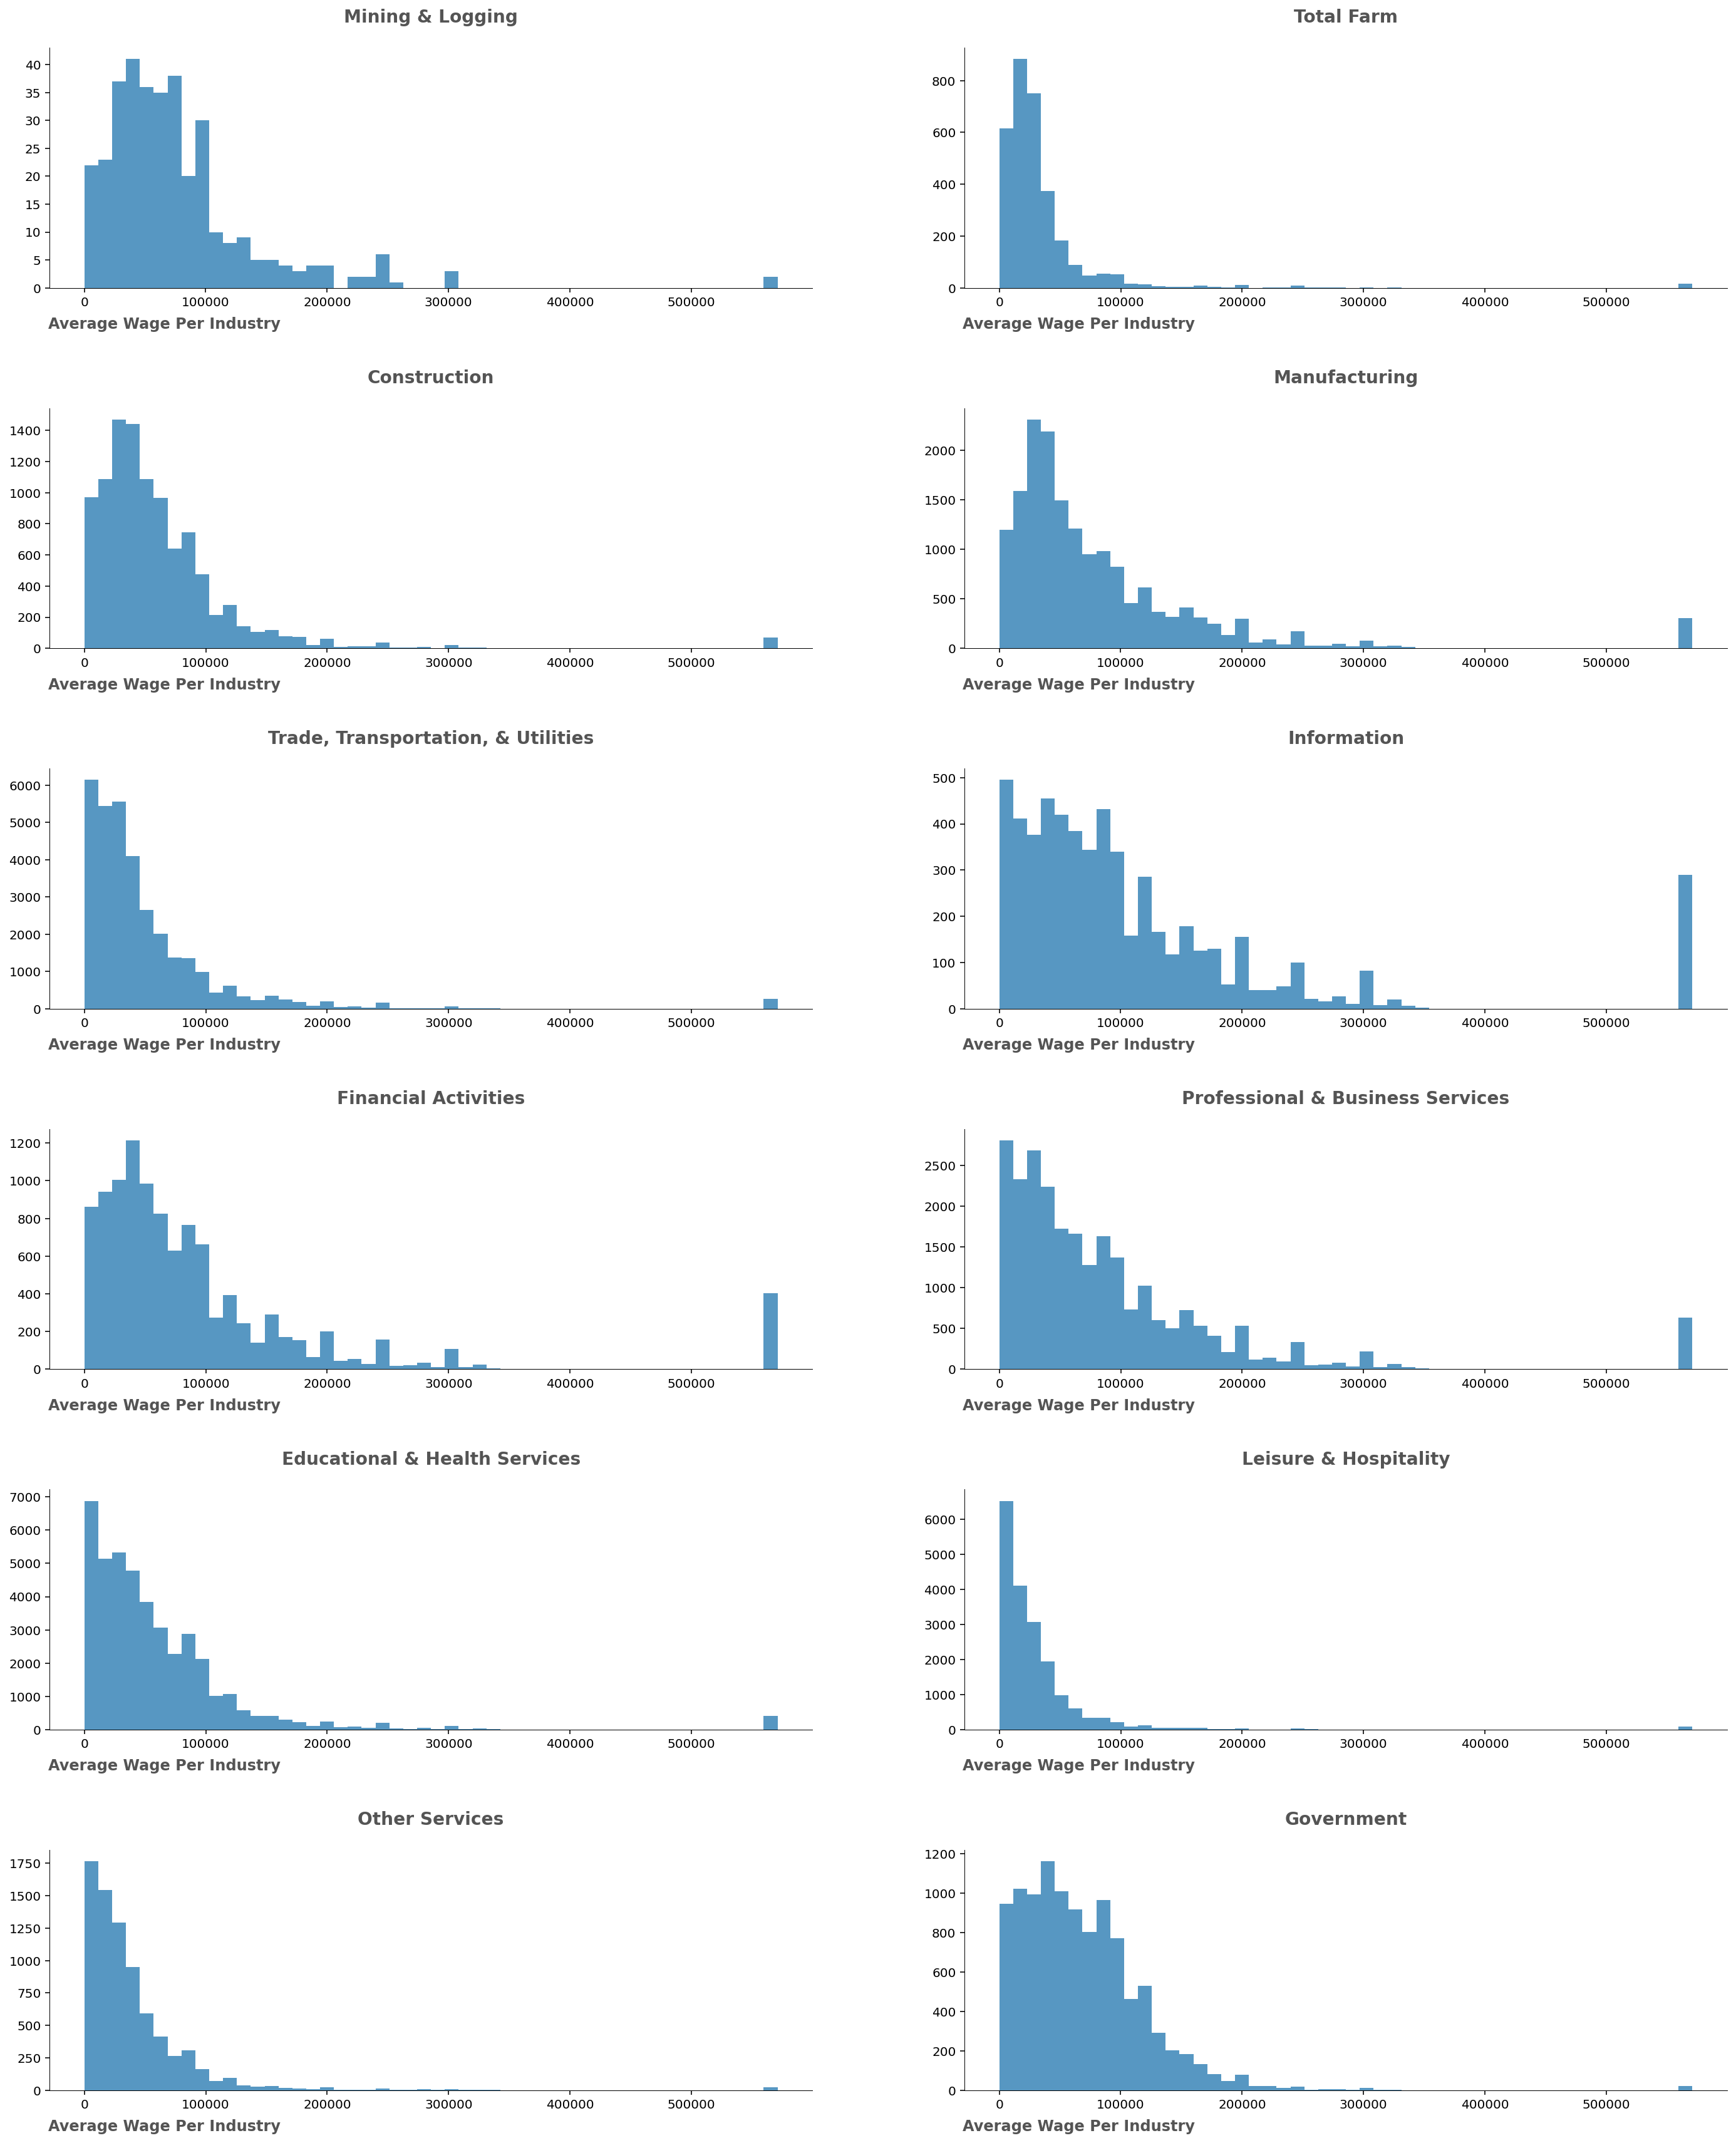

In [103]:
plot_hist_clipped(main_ind_dfs_clip, main_ind_titles)

In [18]:
ca_ipums_wages_regions

,YEAR,STATEFIP,COUNTYFIP,PERWT,INCWAGE,Main_Code,Sub_1_Code,FIPS
CDI Regions,,,,,,,,
Bay Area,2019.0,6.0,54.855936,100.432421,76507.867962,526.745862,540.851844,6054.855936
Central Coast,2019.0,6.0,95.910047,100.179638,48261.519123,528.456272,542.931711,6095.910047
Central Valley,2019.0,6.0,54.235515,116.062959,37303.261924,502.699889,517.811176,6054.235515
Inland Empire,2019.0,6.0,67.716895,113.041597,40120.138658,531.357999,547.613776,6067.716895
Los Angeles,2019.0,6.0,37.000000,97.005528,47186.350577,534.929930,550.429686,6037.000000
Orange,2019.0,6.0,59.000000,102.246310,54661.497043,524.712238,539.934147,6059.000000
Redwood Coast,2019.0,6.0,23.000000,97.873108,28449.580908,541.639115,555.940629,6023.000000
Sacramento,2019.0,6.0,66.182583,101.892399,49713.516605,552.266125,566.946716,6066.182583
San Diego-Imperial,2019.0,6.0,71.377673,112.827983,50297.842627,553.723935,568.362551,6071.377673


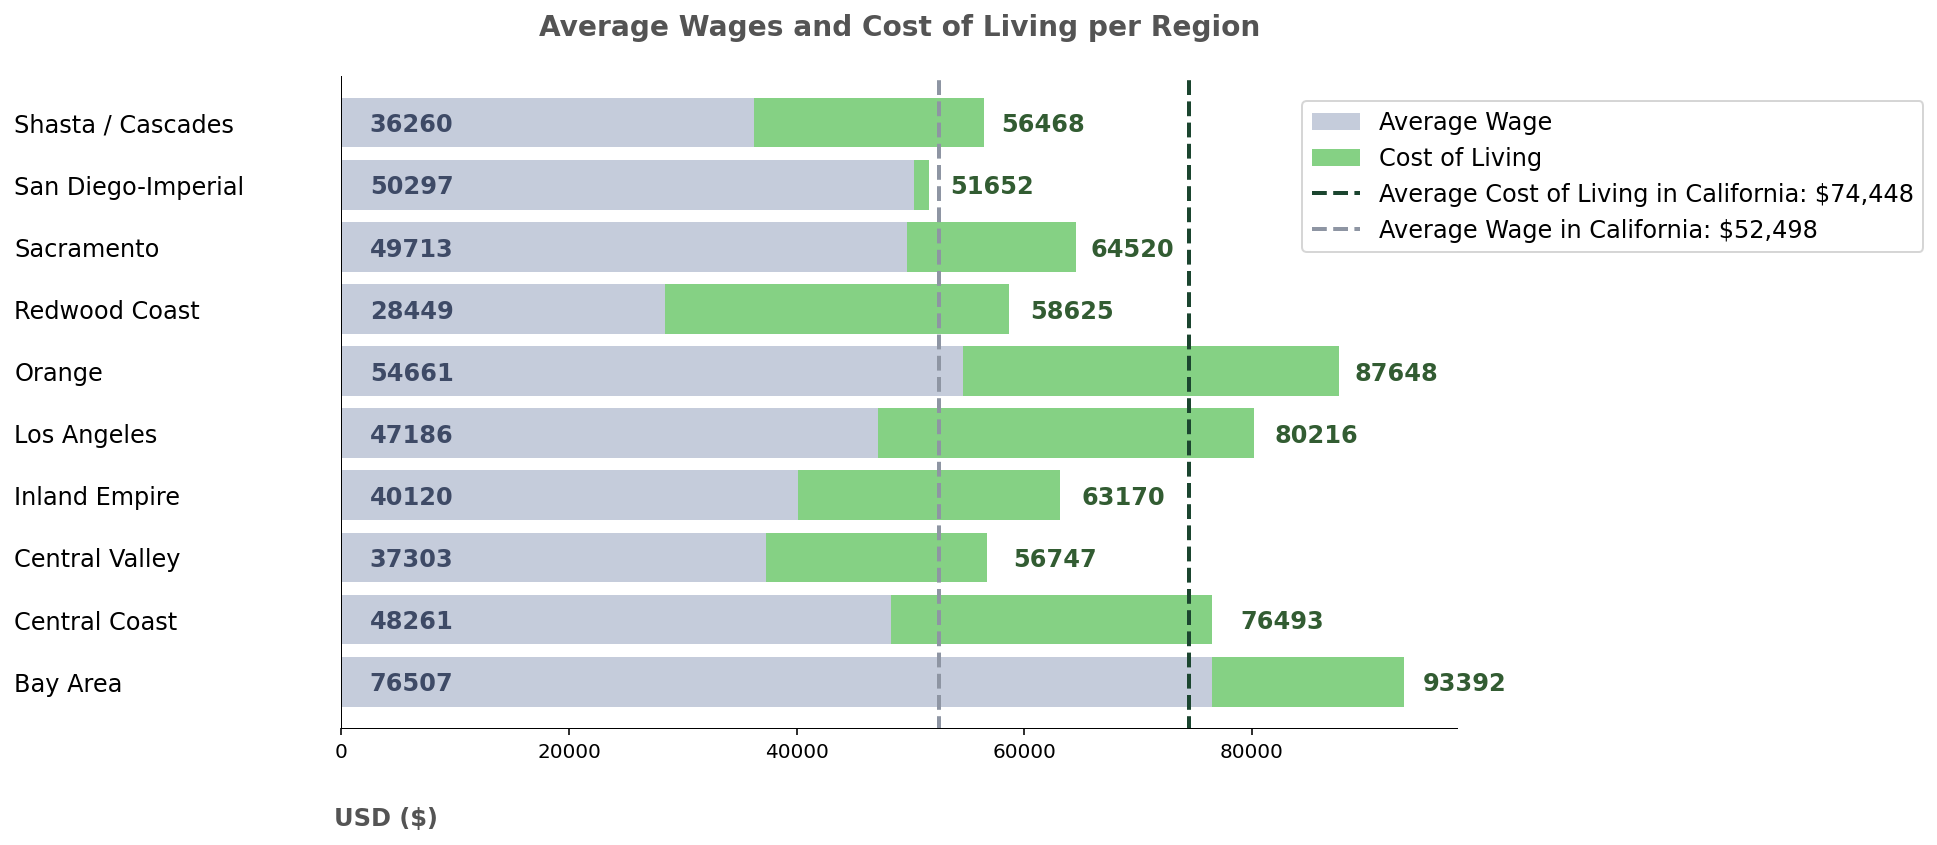

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.barh(np.arange(10), cost_of_living['Cost of Living'][0:10].values, color='#85d184', label="Cost of Living")
bar2 = ax.barh(np.arange(10), ca_ipums_wages_regions['INCWAGE'].values, color='#c5ccdb', label="Average Wage")

ax.set_yticks(np.arange(10))
ax.set_yticklabels(ca_ipums_wages_regions.index, fontsize = 12, ha='left')
ax.tick_params(axis='y',direction='out', pad=160, left=False)

ax.set_xlabel("USD ($)", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.04, -0.12)

avg_wage = int(ca_ipums['INCWAGE'].mean())
ca_col = cost_of_living['Cost of Living'][11:12].values

ax.vlines(x=avg_wage, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average Wage in California: $52,498')
ax.vlines(x=ca_col, ymin=-0.8, ymax=10, 
          color='#1b452f', lw=2, ls='dashed', label='Average Cost of Living in California: $74,448')
ax.set_ylim(-0.75, 9.75)

ax.set_title('Average Wages and Cost of Living per Region', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(cost_of_living['Cost of Living'].values[0])}", (95000, -0.15), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[1])}", (79000, 0.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[2])}", (59000, 1.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[3])}", (65000, 2.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[4])}", (82000, 3.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[5])}", (89000, 4.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[6])}", (60500, 5.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[7])}", (65800, 6.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[8])}", (53500, 7.85), size=12, weight='bold', color='#325c32', annotation_clip=False)
ax.annotate(f"{int(cost_of_living['Cost of Living'].values[9])}", (58000, 8.85), size=12, weight='bold', color='#325c32', annotation_clip=False)

ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[0])}", (2500, -0.15), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[1])}", (2500, 0.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[2])}", (2500, 1.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[3])}", (2500, 2.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[4])}", (2500, 3.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[5])}", (2500, 4.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[6])}", (2500, 5.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[7])}", (2500, 6.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[8])}", (2500, 7.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)
ax.annotate(f"{int(ca_ipums_wages_regions['INCWAGE'].values[9])}", (2500, 8.85), size=12, weight='bold', color='#3e4a66', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.85, 0.98), loc='upper left', fontsize=12)
plt.show()

### High wage count in CA over 2019

In [215]:
hw_state = data.groupby(by=["Date"]).sum()
hw_state['Percentage'] = hw_state['High Wage Count'] / hw_state['Employment Count']
hw_state

,Population,High Wage Count,Employment Count,Cost of Living,Percentage
Date,,,,,
2019-01-01,3587675685,1953057,16001600.0,48984599,0.122054
2019-02-01,3587675685,1965485,16031300.0,48984599,0.122603
2019-03-01,3587675685,1964601,16051200.0,48984599,0.122396
2019-04-01,3587675685,1972604,16122200.0,48984599,0.122353
2019-05-01,3587675685,1976131,16205400.0,48984599,0.121943
2019-06-01,3587675685,1980330,16230800.0,48984599,0.122011
2019-07-01,3587675685,1973622,16054900.0,48984599,0.122930
2019-08-01,3587675685,1977896,16120100.0,48984599,0.122698
2019-09-01,3587675685,1981177,16185200.0,48984599,0.122407


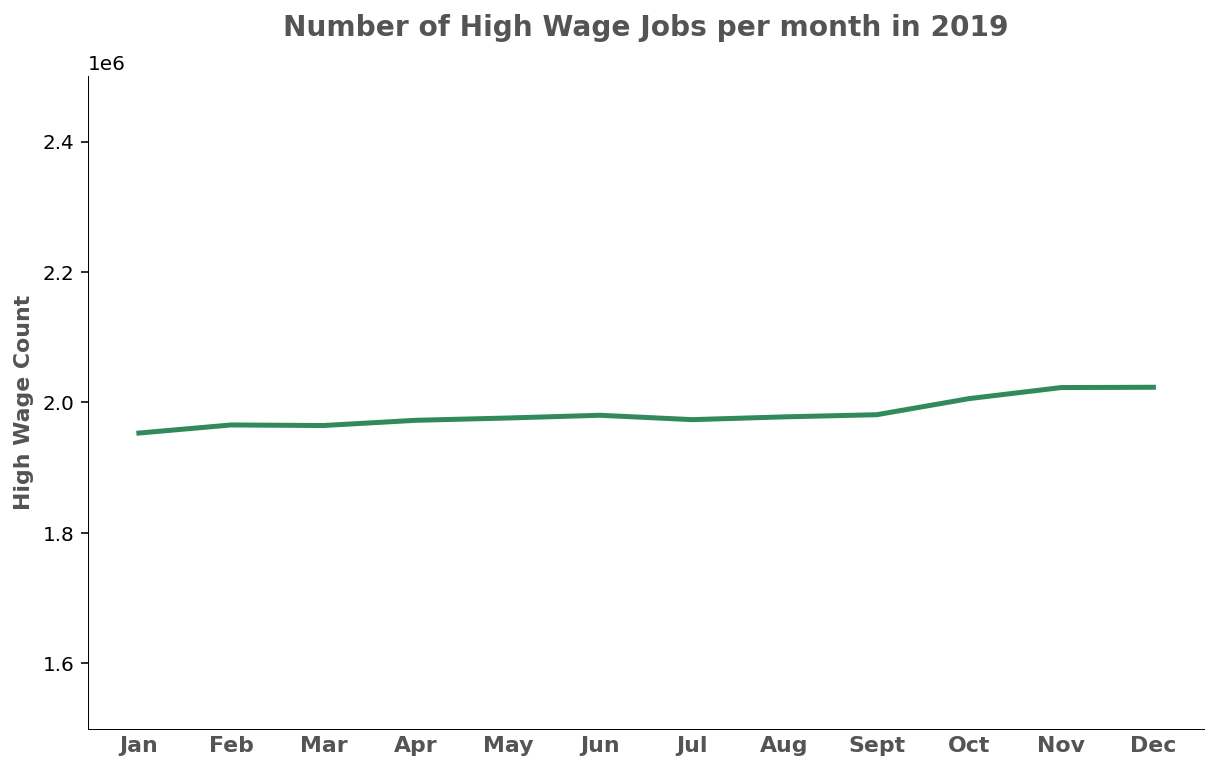

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['High Wage Count'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per month in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(1.5e+6,2.5e+6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

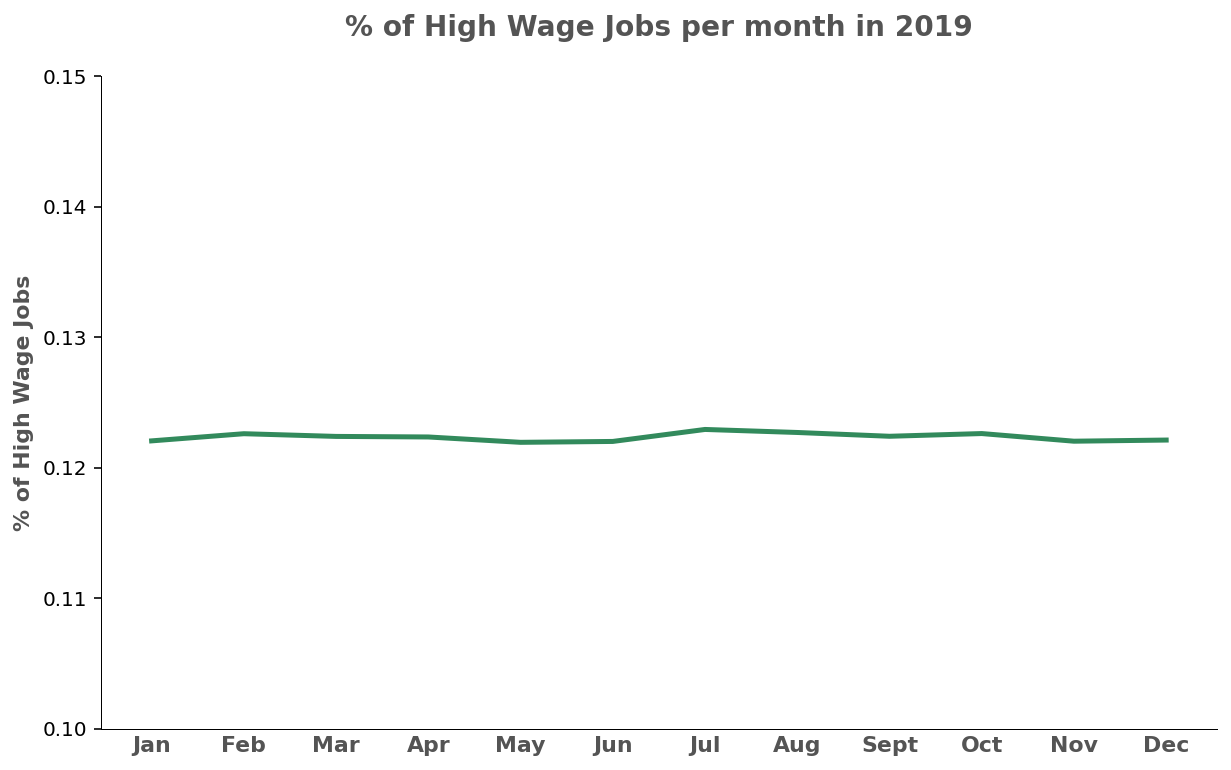

In [219]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_state['Percentage'].values, lw=2.5, color='#328a5c')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('% of High Wage Jobs per month in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.set_ylim(0.1, 0.15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Industries with most and least high wage jobs in the state

In [191]:
hw_state_industry = data.groupby(by=["Industry"]).mean().sort_values(by='High Wage Count')
hw_state_industry_cut = hw_state_industry.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]
hw_state_industry_cut

,Population,High Wage Count,Employment Count,Cost of Living
Industry,,,,
book stores and news dealers,10081570.0,0.000000,2575.000000,80216.0
nonferrous metal except aluminum production and processing,10081570.0,0.000000,6000.000000,80216.0
clothing stores,3316073.0,76.083333,13041.666667,79472.0
taxi and limousine service,10081570.0,216.750000,11850.000000,80216.0
retail bakeries,10081570.0,240.250000,15308.333333,80216.0
management scientific and technical consulting services,6624807.0,11617.541667,40520.833333,83932.0
architectural engineering and related services,5963060.2,12256.400000,29596.666667,83040.0
computer systems design and related services,6624807.0,13254.666667,31458.333333,83932.0
aerospace products and parts manufacturing,6698821.5,14731.375000,26654.166667,79844.0


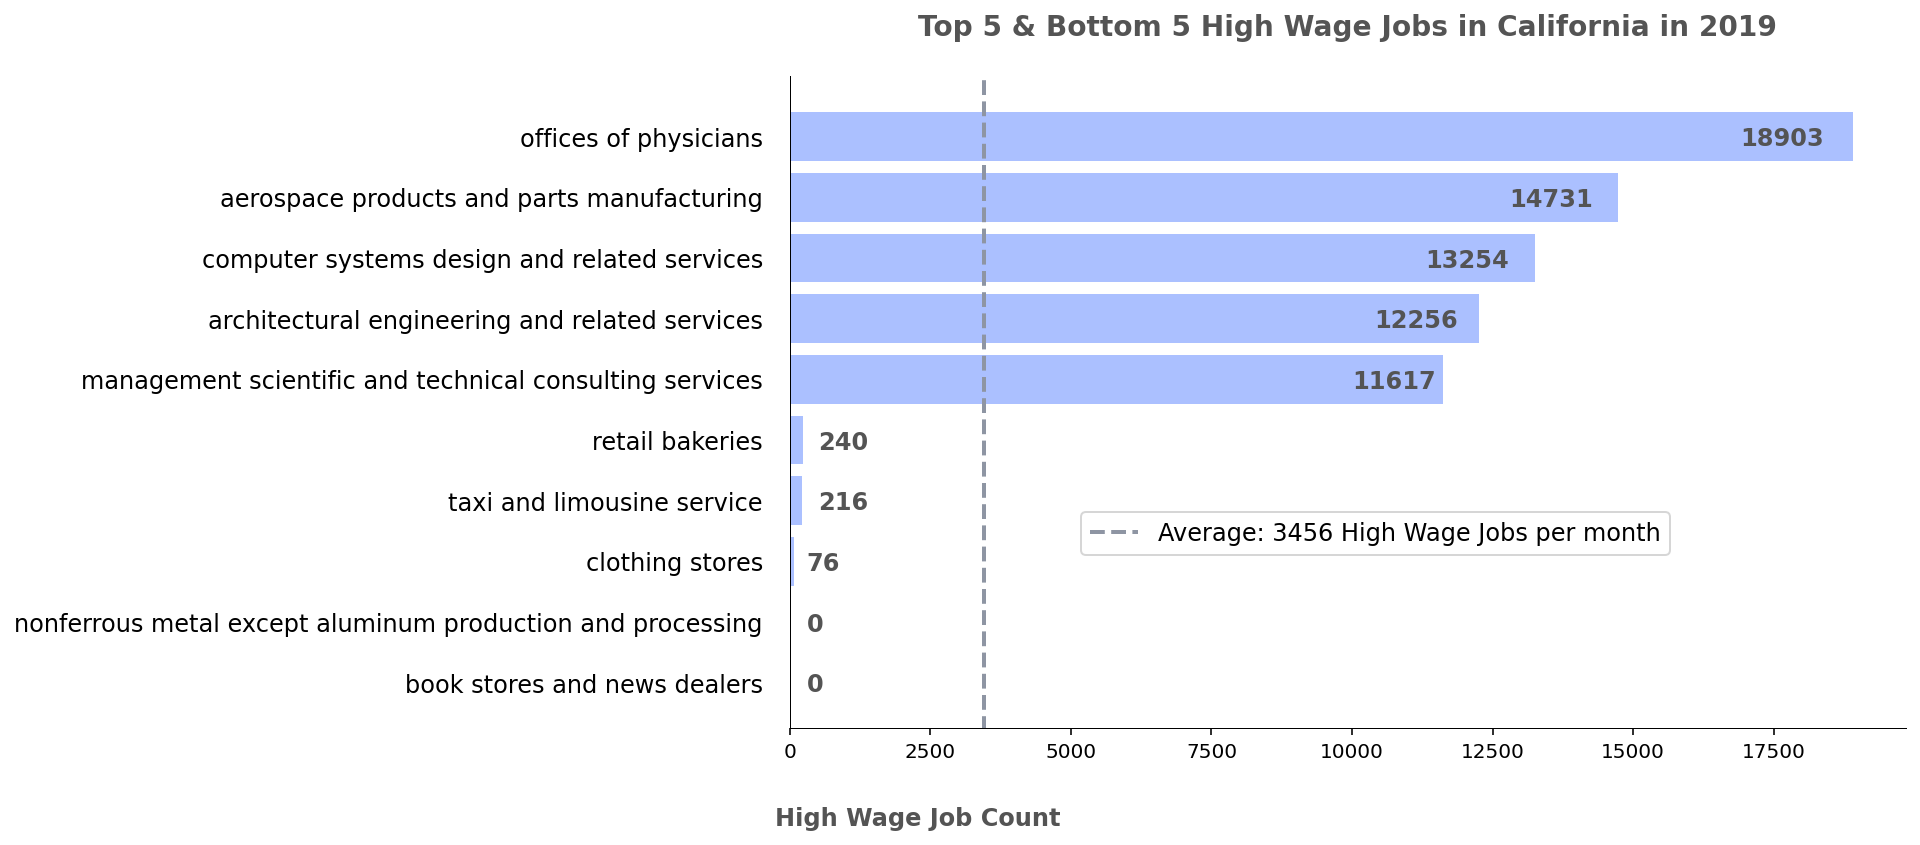

In [192]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_state_industry_cut['High Wage Count'].values, color='#abc0ff')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_state_industry_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_state_industry['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 High Wage Jobs in California in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate("0", (300, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("0", (300, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("76", (300, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("216", (500, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("240", (500, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("11617", (10000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("12256", (10400, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("13254", (11300, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("14731", (12800, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate("18903", (16900, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.35), loc='upper left', fontsize=12)
plt.show()

### Average high wage count in 2019 per region

In [220]:
hw_regions = data.groupby(by=["CDI Regions", "Date"]).sum().groupby(by=['CDI Regions']).mean().sort_values(by='High Wage Count')
hw_regions['Percentage'] = hw_regions['High Wage Count'] / hw_regions['Employment Count']
hw_regions

,Population,High Wage Count,Employment Count,Cost of Living,Percentage
CDI Regions,,,,,
Redwood Coast,1.359400e+05,8.366667e+01,1.008333e+03,59608.0,0.082975
Shasta / Cascades,4.050290e+05,7.615000e+02,3.700000e+03,117486.0,0.205811
Inland Empire,1.368141e+07,7.401000e+03,3.300833e+04,378957.0,0.224216
Central Coast,1.795851e+07,2.644650e+04,2.489083e+05,2748494.0,0.106250
Sacramento,1.114447e+07,3.011483e+04,5.790833e+04,839252.0,0.520043
Central Valley,3.886698e+07,4.072967e+04,5.010417e+05,3090514.0,0.081290
Bay Area,2.960902e+07,1.036218e+05,2.536333e+05,3454456.0,0.408549
San Diego-Imperial,1.858808e+08,1.787078e+05,1.078925e+06,4500568.0,0.165635
Orange,3.865014e+08,4.920622e+05,2.757083e+06,10693056.0,0.178472


In [221]:
hw_regions_perc_sorted = hw_regions.sort_values(by='Percentage')
hw_regions_perc_sorted

,Population,High Wage Count,Employment Count,Cost of Living,Percentage
CDI Regions,,,,,
Central Valley,3.886698e+07,4.072967e+04,5.010417e+05,3090514.0,0.081290
Redwood Coast,1.359400e+05,8.366667e+01,1.008333e+03,59608.0,0.082975
Los Angeles,2.903492e+09,1.103140e+06,1.127365e+07,23102208.0,0.097851
Central Coast,1.795851e+07,2.644650e+04,2.489083e+05,2748494.0,0.106250
San Diego-Imperial,1.858808e+08,1.787078e+05,1.078925e+06,4500568.0,0.165635
Orange,3.865014e+08,4.920622e+05,2.757083e+06,10693056.0,0.178472
Shasta / Cascades,4.050290e+05,7.615000e+02,3.700000e+03,117486.0,0.205811
Inland Empire,1.368141e+07,7.401000e+03,3.300833e+04,378957.0,0.224216
Bay Area,2.960902e+07,1.036218e+05,2.536333e+05,3454456.0,0.408549


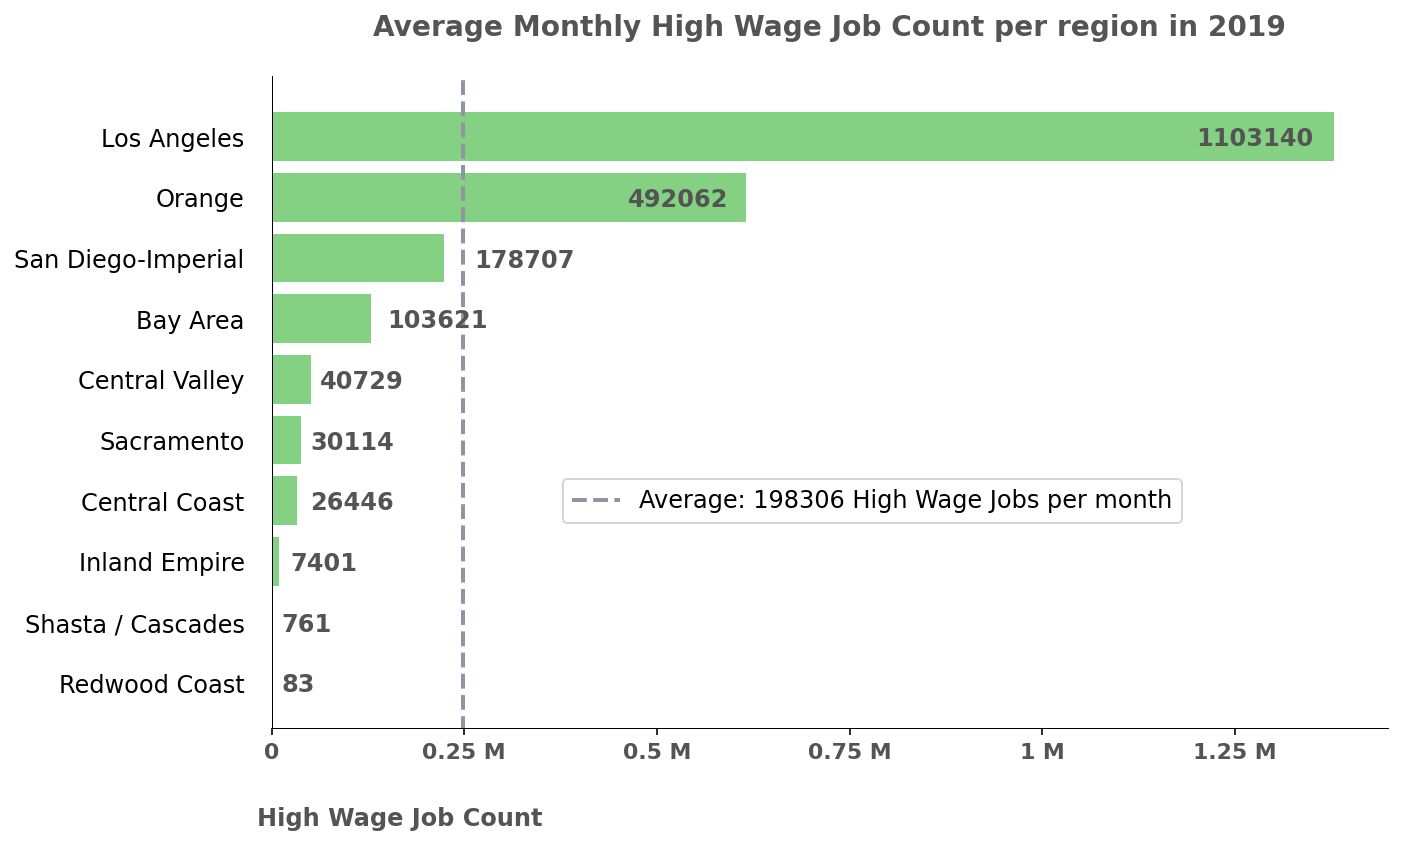

In [194]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = int(hw_regions['High Wage Count'].values.mean())

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val} High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_regions['High Wage Count'].values[0])}", (10000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[1])}", (10000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[2])}", (20000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[3])}", (40000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[4])}", (40000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[5])}", (50000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[6])}", (120000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[7])}", (210000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[8])}", (370000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_regions['High Wage Count'].values[9])}", (960000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.25, 0.4), loc='upper left', fontsize=12)
plt.show()

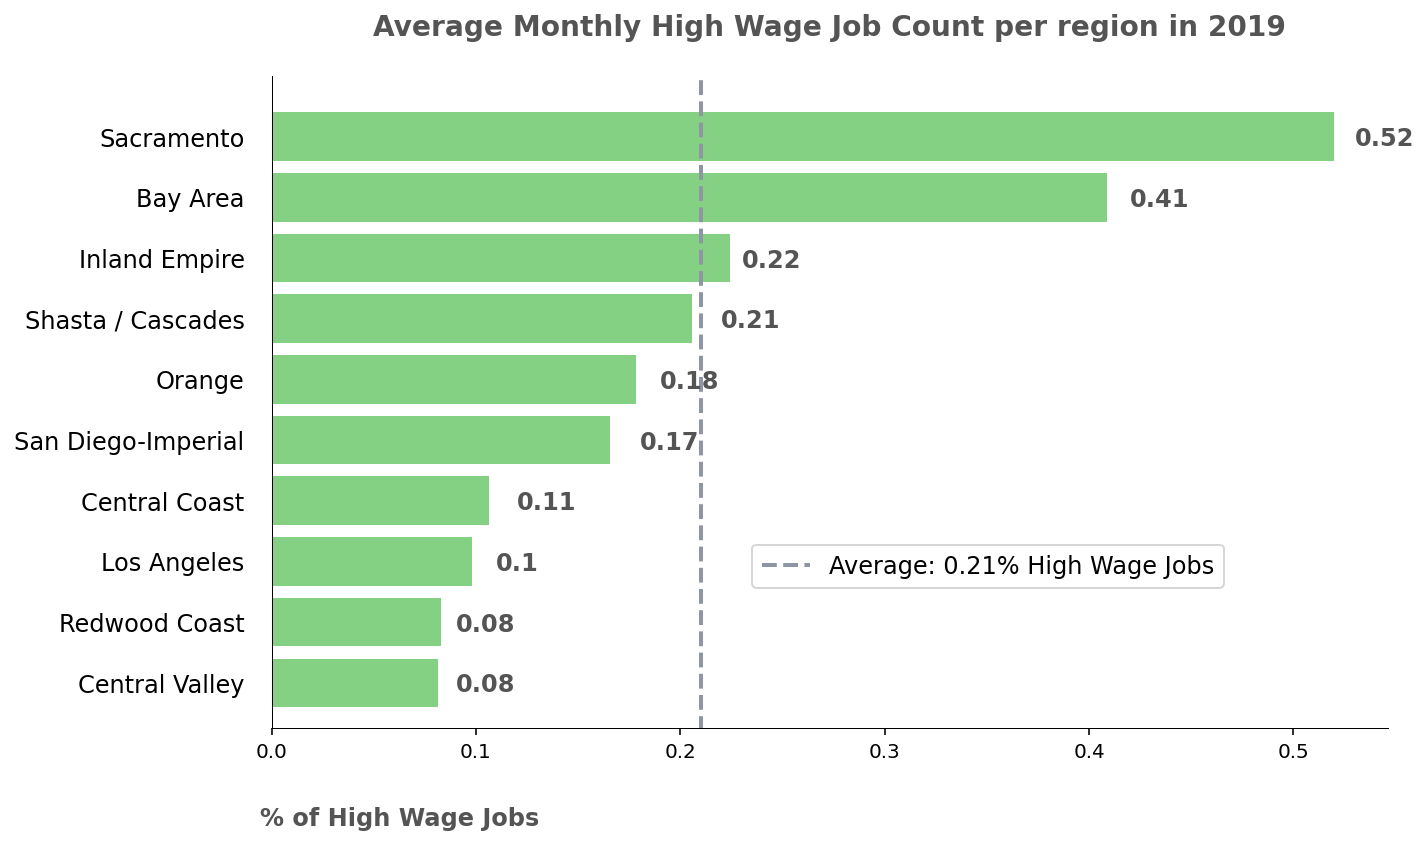

In [232]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_regions_perc_sorted['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_regions_perc_sorted.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

mean_val = round(hw_regions_perc_sorted['Percentage'].values.mean(), 2)

ax.vlines(x=mean_val, ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs')
ax.set_ylim(-0.75, 10)

ax.set_title('Average Monthly High Wage Job Count per region in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[0], 2)}", (0.09, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[1], 2)}", (0.09, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[2], 2)}", (0.11, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[3], 2)}", (0.12, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[4], 2)}", (0.18, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[5], 2)}", (0.19, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[6], 2)}", (0.22, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[7], 2)}", (0.23, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[8], 2)}", (0.42, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_regions_perc_sorted['Percentage'].values[9], 2)}", (0.53, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.42, 0.3), loc='upper left', fontsize=12)
plt.show()

In [195]:
shasta_data = data.loc[data['CDI Regions'] == 'Shasta / Cascades']
cv_data = data.loc[data['CDI Regions'] == 'Central Valley']
rc_data = data.loc[data['CDI Regions'] == 'Redwood Coast']
sd_data = data.loc[data['CDI Regions'] == 'San Diego-Imperial']
orange_data = data.loc[data['CDI Regions'] == 'Orange']
ie_data = data.loc[data['CDI Regions'] == 'Inland Empire']
cc_data = data.loc[data['CDI Regions'] == 'Central Coast']
bay_data = data.loc[data['CDI Regions'] == 'Bay Area']
sac_data = data.loc[data['CDI Regions'] == 'Sacramento']
la_data = data.loc[data['CDI Regions'] == 'Los Angeles']

In [233]:
hw_shasta = shasta_data.groupby(by=["Date"]).sum()
hw_shasta['Percentage'] = hw_shasta['High Wage Count'] / hw_shasta['Employment Count']
hw_cv = cv_data.groupby(by=["Date"]).sum()
hw_cv['Percentage'] = hw_cv['High Wage Count'] / hw_cv['Employment Count']
hw_rc = rc_data.groupby(by=["Date"]).sum()
hw_rc['Percentage'] = hw_rc['High Wage Count'] / hw_rc['Employment Count']
hw_sd = sd_data.groupby(by=["Date"]).sum()
hw_sd['Percentage'] = hw_sd['High Wage Count'] / hw_sd['Employment Count']
hw_orange = orange_data.groupby(by=["Date"]).sum()
hw_orange['Percentage'] = hw_orange['High Wage Count'] / hw_orange['Employment Count']
hw_ie = ie_data.groupby(by=["Date"]).sum()
hw_ie['Percentage'] = hw_ie['High Wage Count'] / hw_ie['Employment Count']
hw_cc = cc_data.groupby(by=["Date"]).sum()
hw_cc['Percentage'] = hw_cc['High Wage Count'] / hw_cc['Employment Count']
hw_bay = bay_data.groupby(by=["Date"]).sum()
hw_bay['Percentage'] = hw_bay['High Wage Count'] / hw_bay['Employment Count']
hw_sac = sac_data.groupby(by=["Date"]).sum()
hw_sac['Percentage'] = hw_sac['High Wage Count'] / hw_sac['Employment Count']
hw_la = la_data.groupby(by=["Date"]).sum()
hw_la['Percentage'] = hw_la['High Wage Count'] / hw_la['Employment Count']

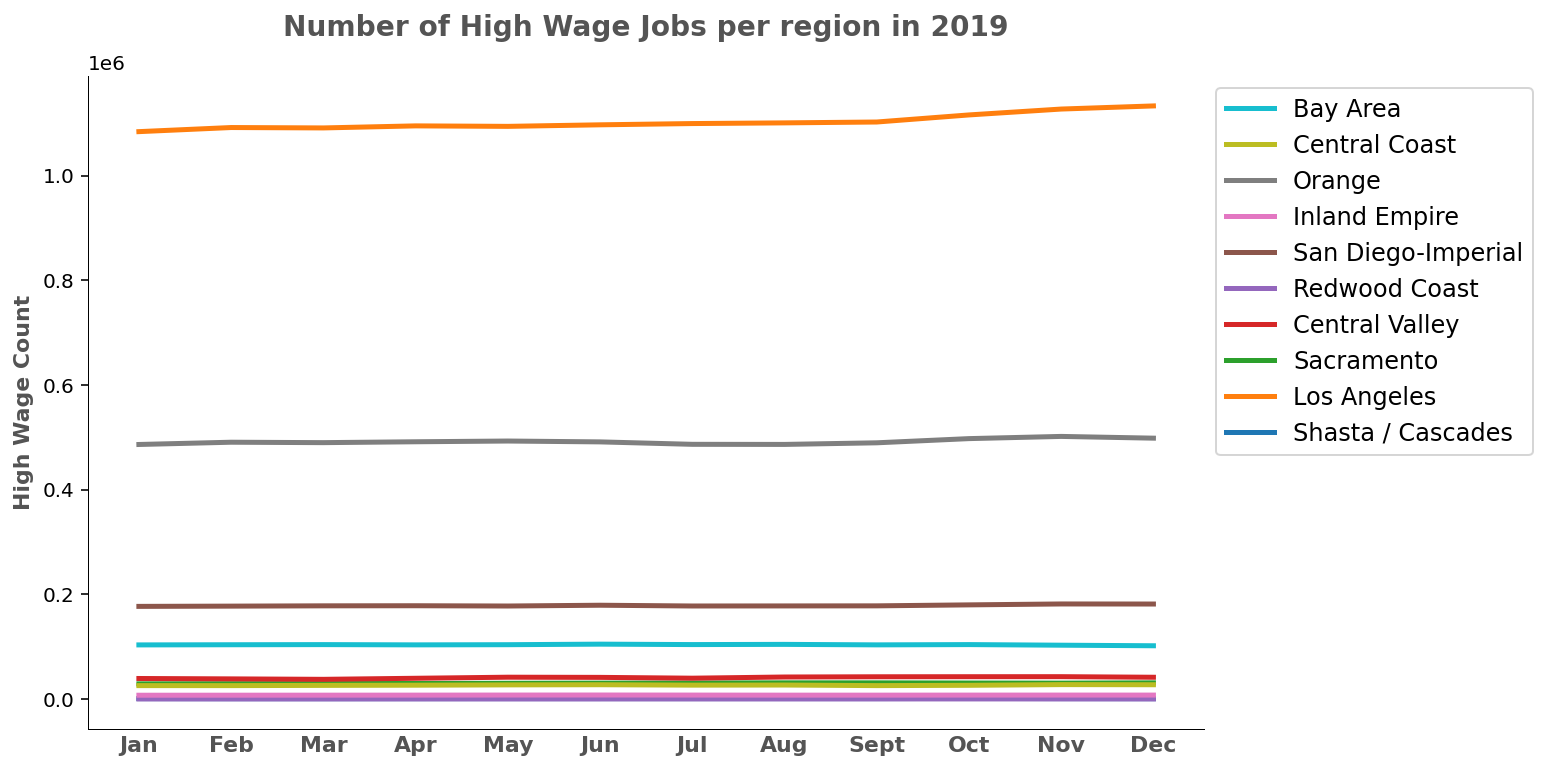

In [198]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['High Wage Count'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['High Wage Count'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['High Wage Count'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['High Wage Count'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['High Wage Count'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['High Wage Count'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['High Wage Count'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['High Wage Count'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['High Wage Count'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['High Wage Count'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Number of High Wage Jobs per region in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('High Wage Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

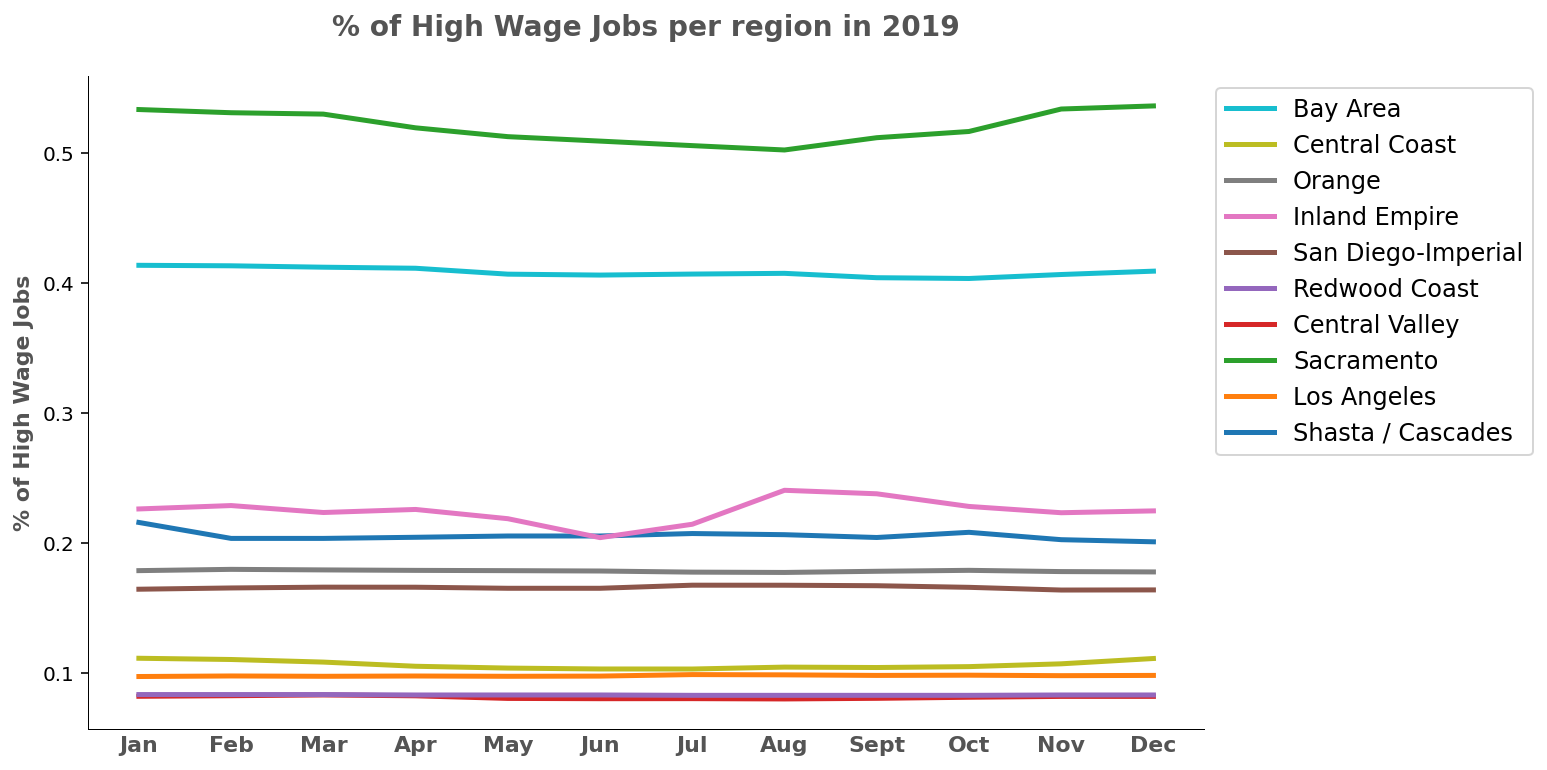

In [235]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hw_shasta['Percentage'].values, lw=2.5, label='Shasta / Cascades')
ax.plot(hw_la['Percentage'].values, lw=2.5, label='Los Angeles')
ax.plot(hw_sac['Percentage'].values, lw=2.5, label='Sacramento')
ax.plot(hw_cv['Percentage'].values, lw=2.5, label='Central Valley')
ax.plot(hw_rc['Percentage'].values, lw=2.5, label='Redwood Coast')
ax.plot(hw_sd['Percentage'].values, lw=2.5, label='San Diego-Imperial')
ax.plot(hw_ie['Percentage'].values, lw=2.5, label='Inland Empire')
ax.plot(hw_orange['Percentage'].values, lw=2.5, label='Orange')
ax.plot(hw_cc['Percentage'].values, lw=2.5, label='Central Coast')
ax.plot(hw_bay['Percentage'].values, lw=2.5, label='Bay Area')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('% of High Wage Jobs per region in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('% of High Wage Jobs', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()

### Average high wage count between rural and urban locations

In [236]:
hw_rural_urban = data.groupby(by=["Rural/Urban", "Date"]).sum().groupby(by=['Rural/Urban']).mean().sort_values(by='High Wage Count')
hw_rural_urban['Percentage'] = hw_rural_urban['High Wage Count'] / hw_rural_urban['Employment Count']
hw_rural_urban

,Population,High Wage Count,Employment Count,Cost of Living,Percentage
Rural/Urban,,,,,
Rural,1.479412e+07,3.184692e+04,2.334333e+05,3022191.0,0.136428
Urban,3.572882e+09,1.951222e+06,1.597543e+07,45962408.0,0.122139


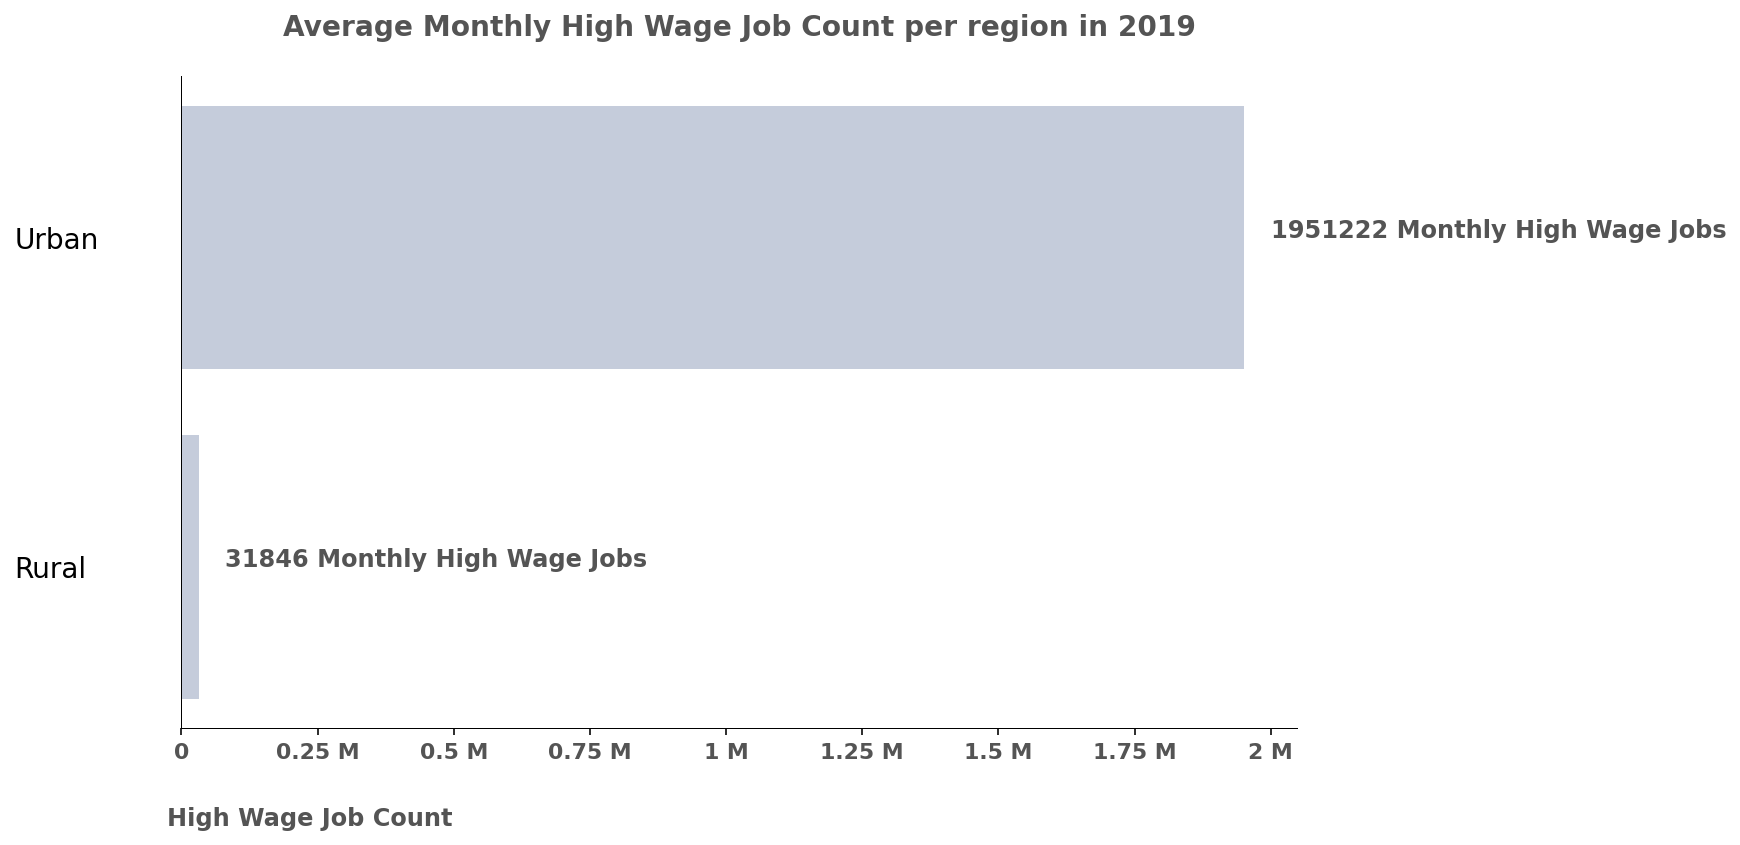

In [200]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(2), hw_rural_urban['High Wage Count'].values, color='#c5ccdb')

ax.set_yticks(np.arange(2))
ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
ax.tick_params(axis='y',direction='out', pad=80, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.annotate(f"{int(hw_rural_urban['High Wage Count'].values[1])} Monthly High Wage Jobs", (2000000, 1), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_rural_urban['High Wage Count'].values[0])} Monthly High Wage Jobs", (80000, 0), size=12, weight='bold', color='#545454', annotation_clip=False)
weight='bold', 
ax.set_title('Average Monthly High Wage Job Count in Rural/Urban Areas in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

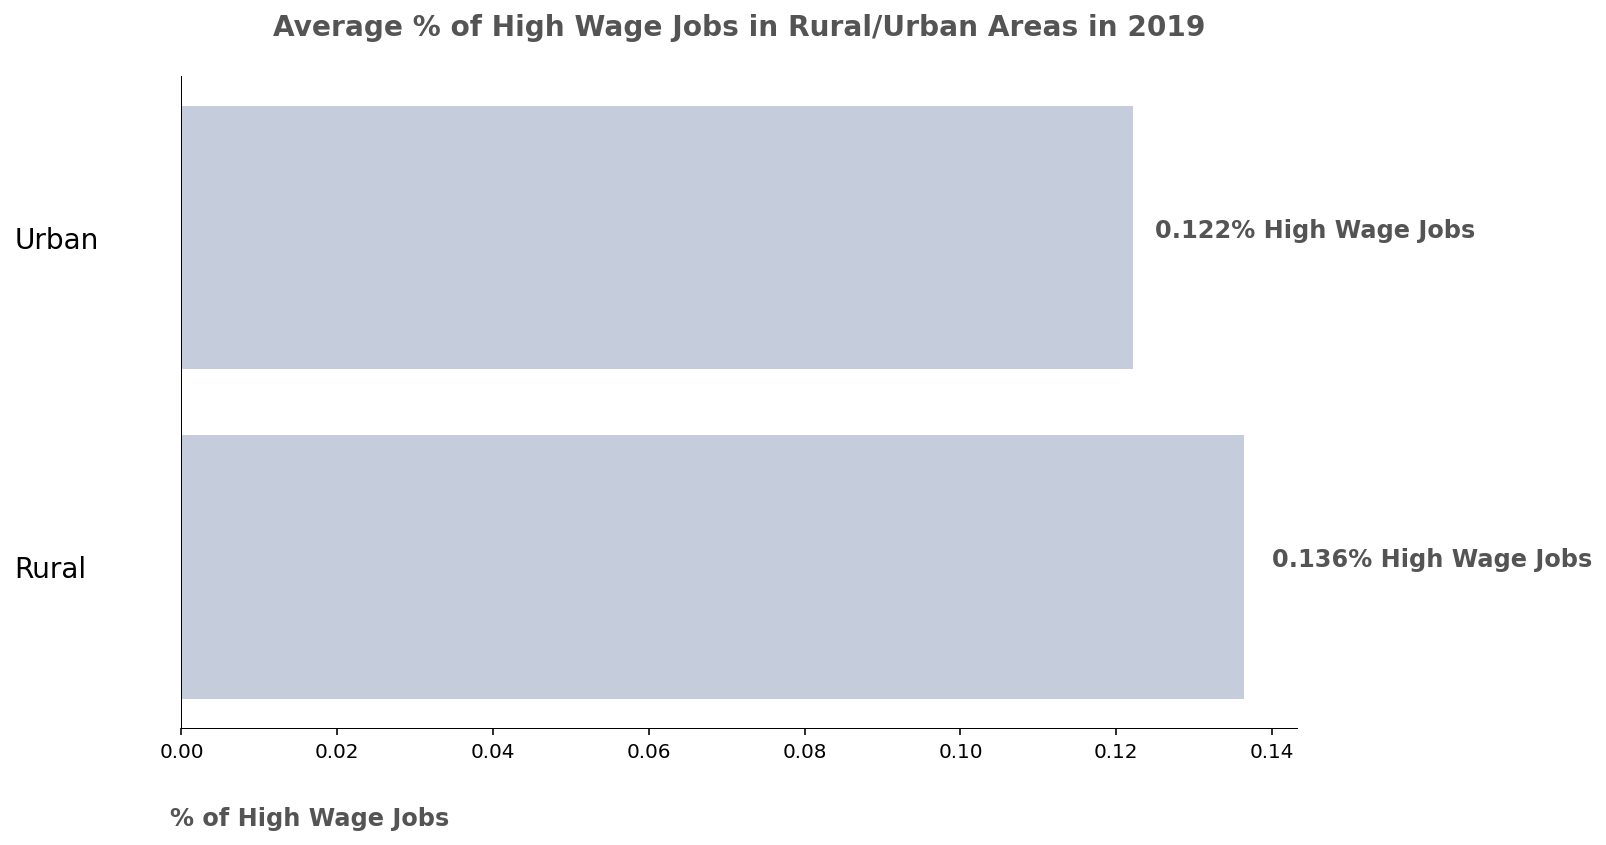

In [241]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(2), hw_rural_urban['Percentage'].values, color='#c5ccdb')

ax.set_yticks(np.arange(2))
ax.set_yticklabels(hw_rural_urban.index, fontsize = 14, ha='left')
ax.tick_params(axis='y',direction='out', pad=80, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
# ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
#                    fontsize=11, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)

ax.annotate(f"{round(hw_rural_urban['Percentage'].values[1], 3)}% High Wage Jobs", (0.125, 1), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_rural_urban['Percentage'].values[0], 3)}% High Wage Jobs", (0.14, 0), size=12, weight='bold', color='#545454', annotation_clip=False)
weight='bold', 
ax.set_title('Average % of High Wage Jobs in Rural/Urban Areas in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.show()

### Tree Plot

In [201]:
hw_regions = hw_regions.sort_values('High Wage Count', ascending=False)
hw_regions

,Population,High Wage Count,Employment Count,Cost of Living
CDI Regions,,,,
Los Angeles,2.903492e+09,1.103140e+06,1.127365e+07,23102208.0
Orange,3.865014e+08,4.920622e+05,2.757083e+06,10693056.0
San Diego-Imperial,1.858808e+08,1.787078e+05,1.078925e+06,4500568.0
Bay Area,2.960902e+07,1.036218e+05,2.536333e+05,3454456.0
Central Valley,3.886698e+07,4.072967e+04,5.010417e+05,3090514.0
Sacramento,1.114447e+07,3.011483e+04,5.790833e+04,839252.0
Central Coast,1.795851e+07,2.644650e+04,2.489083e+05,2748494.0
Inland Empire,1.368141e+07,7.401000e+03,3.300833e+04,378957.0
Shasta / Cascades,4.050290e+05,7.615000e+02,3.700000e+03,117486.0


In [203]:
data_dec2019 = data.loc[data['Date'] == '2019-12-01']
data_dec2019.head()

,Industry,Date,County,CDI Regions,Rural/Urban,Population,High Wage Count,Employment Count,Cost of Living
22,accounting tax preparation bookkeeping and pay...,2019-12-01,Los Angeles,Los Angeles,Urban,10081570,9557,48400.0,80216
23,accounting tax preparation bookkeeping and pay...,2019-12-01,Los Angeles,Los Angeles,Urban,10081570,9557,48400.0,80216
46,advertising public relations and related services,2019-12-01,Los Angeles,Los Angeles,Urban,10081570,9576,26800.0,80216
47,advertising public relations and related services,2019-12-01,Los Angeles,Los Angeles,Urban,10081570,9576,26800.0,80216
92,aerospace products and parts manufacturing,2019-12-01,Los Angeles,Los Angeles,Urban,10081570,21850,40800.0,80216


In [204]:
fig = px.treemap(data_dec2019, 
                 path=[px.Constant('California'), 'Rural/Urban', 'CDI Regions', 'County'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [205]:
# rural
rural = data_dec2019.loc[data_dec2019['Rural/Urban'] == 'Rural']
fig = px.treemap(rural, 
                 path=[px.Constant('Rural'), 'CDI Regions', 'County'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.show()

In [206]:
# urban
urban = data_dec2019.loc[data_dec2019['Rural/Urban'] == 'Urban']
fig = px.treemap(urban, 
                 path=[px.Constant('Urban'), 'CDI Regions', 'County'], 
                 values='High Wage Count',
                )
fig.update_traces(root_color='lightgrey')
fig.show()

### Top 5 & Bottom 5 Counties by number of high wage jobs

In [207]:
hw_county = data.groupby(by=["County", 'Date']).sum().groupby(by=['County']).mean().sort_values(by='High Wage Count')
hw_county_cut = hw_county.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [244]:
hw_county['Percentage'] = hw_county['High Wage Count'] / hw_county['Employment Count']

In [246]:
hw_county_cut

,Population,High Wage Count,Employment Count,Cost of Living,Percentage
County,,,,,
Imperial,1.807010e+05,0.000000e+00,1.125000e+04,50136.0,0.000000
Marin,2.599430e+05,1.350000e+01,3.833333e+02,114139.0,0.035217
El Dorado,1.885630e+05,2.033333e+01,3.250000e+02,65348.0,0.062564
Kings,1.506910e+05,3.166667e+01,7.516667e+03,56569.0,0.004213
Humboldt,1.359400e+05,8.366667e+01,1.008333e+03,59608.0,0.082975
San Francisco,2.624883e+06,2.491442e+04,4.056667e+04,344424.0,0.614160
Sacramento,9.147318e+06,2.582467e+04,4.550000e+04,382938.0,0.567575
San Diego,1.857001e+08,1.787078e+05,1.067675e+06,4450432.0,0.167380
Orange,3.865014e+08,4.920622e+05,2.757083e+06,10693056.0,0.178472


In [248]:
hw_county_cut_perc_sorted = hw_county.sort_values(by='Percentage')
hw_county_cut_perc_sorted = hw_county_cut_perc_sorted.iloc[[0, 1, 2, 3, 4, -5, -4, -3, -2, -1]]

In [249]:
hw_county_cut_perc_sorted

,Population,High Wage Count,Employment Count,Cost of Living,Percentage
County,,,,,
Imperial,180701.0,0.000000,11250.000000,50136.0,0.000000
Kings,150691.0,31.666667,7516.666667,56569.0,0.004213
Madera,155433.0,123.500000,12550.000000,58718.0,0.009841
Santa Cruz,273962.0,139.750000,8200.000000,92540.0,0.017043
Marin,259943.0,13.500000,383.333333,114139.0,0.035217
San Mateo,2302269.0,8886.416667,15616.666667,337818.0,0.569034
Placer,1156536.0,2536.666667,4300.000000,191949.0,0.589922
Contra Costa,3426753.0,11042.750000,18533.333333,258852.0,0.595832
Alameda,4970262.0,20476.333333,33600.000000,264888.0,0.609415


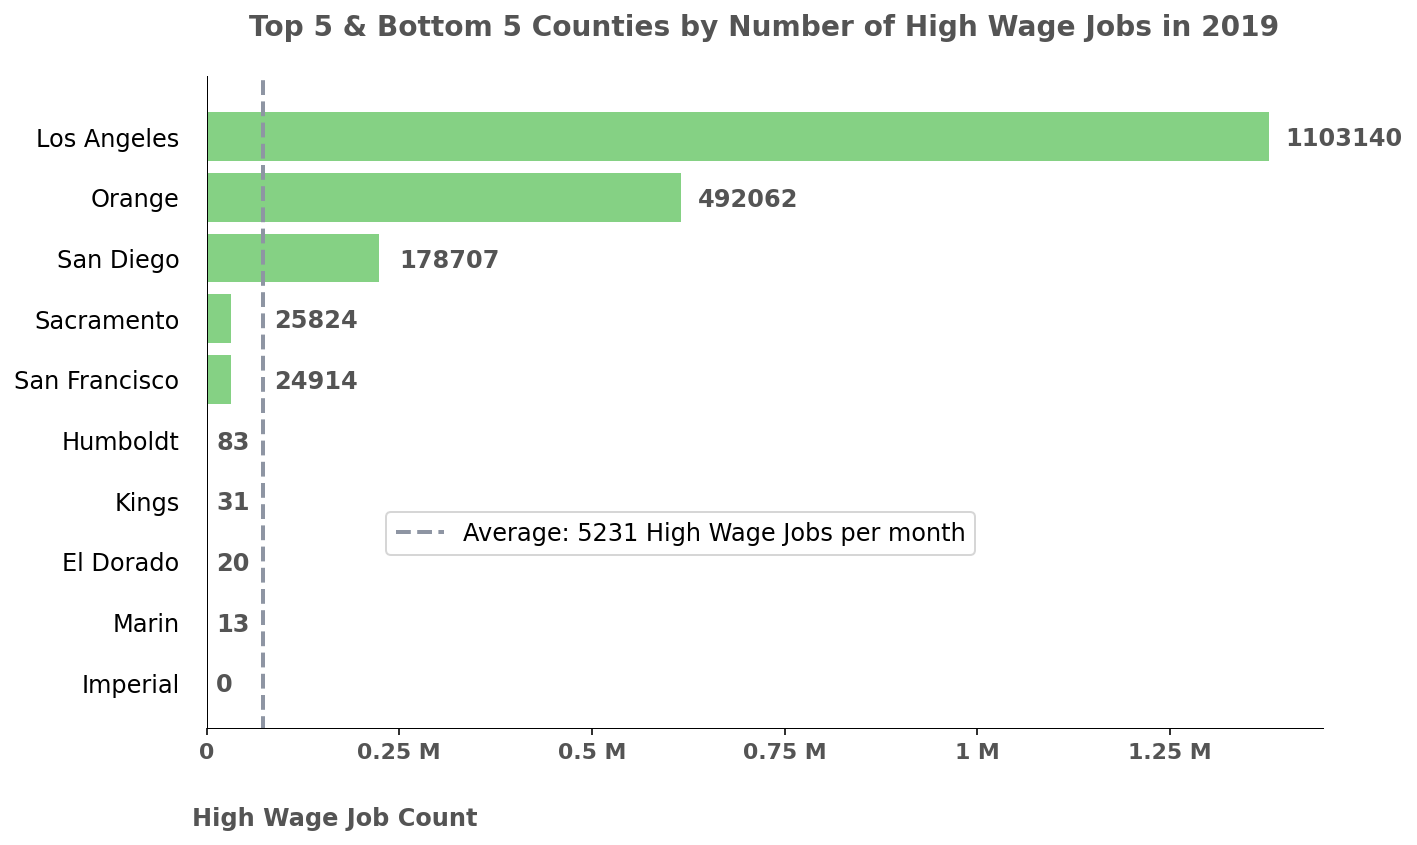

In [258]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut['High Wage Count'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("High Wage Job Count", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)
ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
                   fontsize=11, weight='bold', color = '#545454')

ax.vlines(x=hw_county['High Wage Count'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label='Average: 5231 High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by Number of High Wage Jobs in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[0])}", (10000, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[1])}", (10000, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[2])}", (10000, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[3])}", (10000, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[4])}", (10000, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[5])}", (70000, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[6])}", (70000, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[7])}", (200000, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[8])}", (510000, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{int(hw_county_cut['High Wage Count'].values[9])}", (1120000, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.15, 0.35), loc='upper left', fontsize=12)
plt.show()

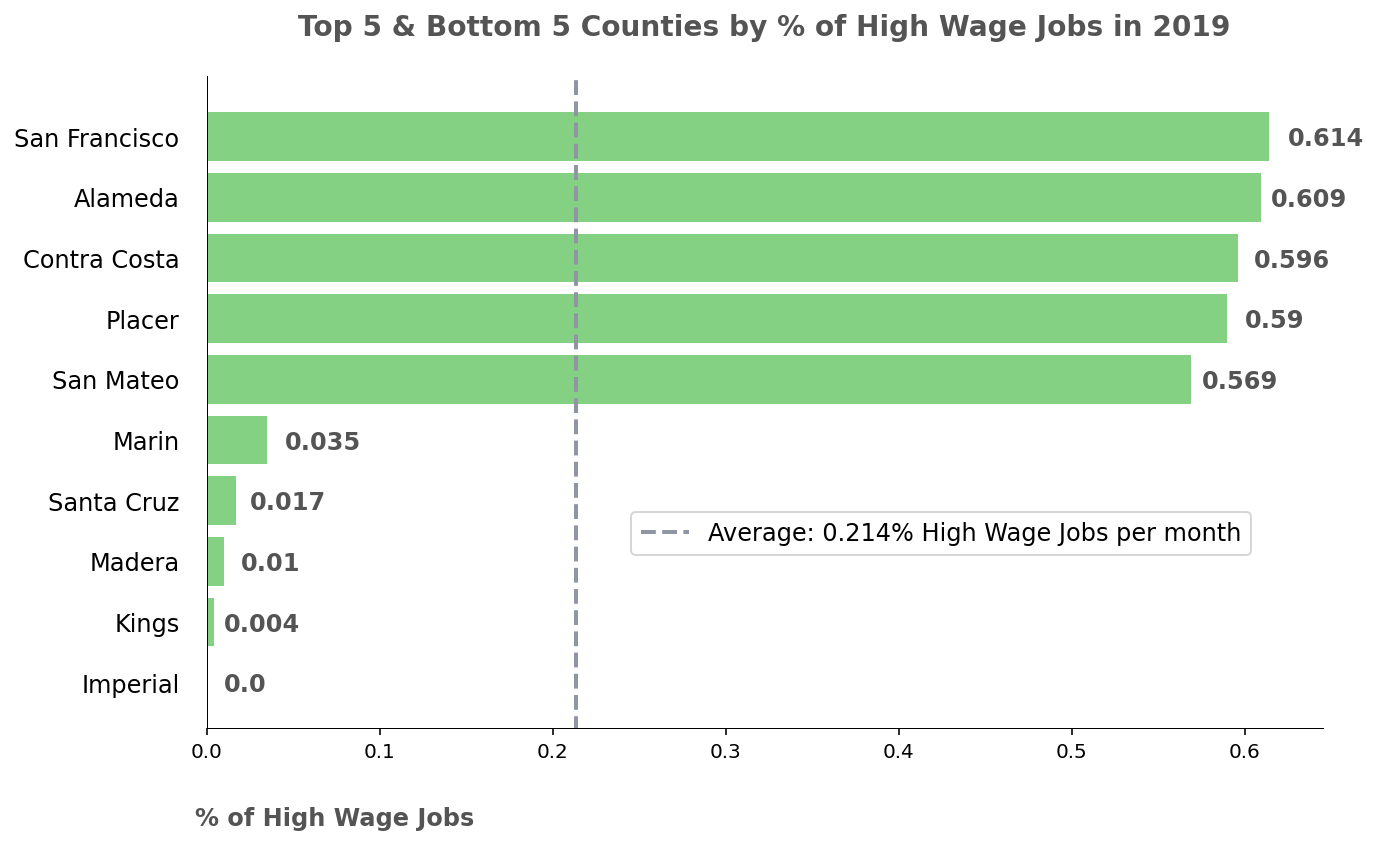

In [261]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(10), hw_county_cut_perc_sorted['Percentage'].values, color='#85d184')

ax.set_yticks(np.arange(10))
ax.set_yticklabels(hw_county_cut_perc_sorted.index, fontsize = 12, ha='right')
ax.tick_params(axis='y',direction='out', pad=10, left=False)

ax.set_xlabel("% of High Wage Jobs", fontsize=12, weight='bold', color = '#545454')
ax.xaxis.set_label_coords(0.115, -0.12)
# ax.set_xticklabels(['0', '0.25 M','0.5 M','0.75 M','1 M','1.25 M','1.5 M','1.75 M','2 M'], 
#                    fontsize=11, weight='bold', color = '#545454')

mean_val = round(hw_county['Percentage'].values.mean(), 3)

ax.vlines(x=hw_county['Percentage'].values.mean(), ymin=-0.8, ymax=10, 
          color='#8e95a3', lw=2, ls='dashed', label=f'Average: {mean_val}% High Wage Jobs per month')
ax.set_ylim(-0.75, 10)

ax.set_title('Top 5 & Bottom 5 Counties by % of High Wage Jobs in 2019', 
             fontsize=14, weight='bold', pad=20, color='#545454')

ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[0], 3)}", (0.01, -0.15), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[1], 3)}", (0.01, 0.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[2], 3)}", (0.02, 1.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[3], 3)}", (0.025, 2.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[4], 3)}", (0.045, 3.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[5], 3)}", (0.575, 4.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[6], 3)}", (0.6, 5.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[7], 3)}", (0.605, 6.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[8], 3)}", (0.615, 7.85), size=12, weight='bold', color='#545454', annotation_clip=False)
ax.annotate(f"{round(hw_county_cut_perc_sorted['Percentage'].values[9], 3)}", (0.625, 8.85), size=12, weight='bold', color='#545454', annotation_clip=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(0.37, 0.35), loc='upper left', fontsize=12)
plt.show()

### Job Creation Numbers

In [210]:
data.head()

,Industry,Date,County,CDI Regions,Rural/Urban,Population,High Wage Count,Employment Count,Cost of Living
0,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,43000.0,80216
1,accounting tax preparation bookkeeping and pay...,2019-01-01,Los Angeles,Los Angeles,Urban,10081570,8490,43000.0,80216
2,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,47400.0,80216
3,accounting tax preparation bookkeeping and pay...,2019-02-01,Los Angeles,Los Angeles,Urban,10081570,9359,47400.0,80216
4,accounting tax preparation bookkeeping and pay...,2019-03-01,Los Angeles,Los Angeles,Urban,10081570,9517,48200.0,80216


In [211]:
data_jobcreation = data.groupby(by=['CDI Regions', 'Date']).sum()[['High Wage Count']]
data_jobcreation['Job Creation'] = data_jobcreation['High Wage Count'].diff()
data_jobcreation = data_jobcreation.reset_index()
data_jobcreation = data_jobcreation.loc[data_jobcreation['Date'] != '2019-01-01']
data_jobcreation.head()

,CDI Regions,Date,High Wage Count,Job Creation
1,Bay Area,2019-02-01,103686,318.0
2,Bay Area,2019-03-01,103952,266.0
3,Bay Area,2019-04-01,103461,-491.0
4,Bay Area,2019-05-01,103782,321.0
5,Bay Area,2019-06-01,104821,1039.0


In [212]:
shasta_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Shasta / Cascades']
cv_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Central Valley']
rc_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Redwood Coast']
sd_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'San Diego-Imperial']
orange_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Orange']
ie_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Inland Empire']
cc_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Central Coast']
bay_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Bay Area']
sac_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Sacramento']
la_jc = data_jobcreation.loc[data_jobcreation['CDI Regions'] == 'Los Angeles']

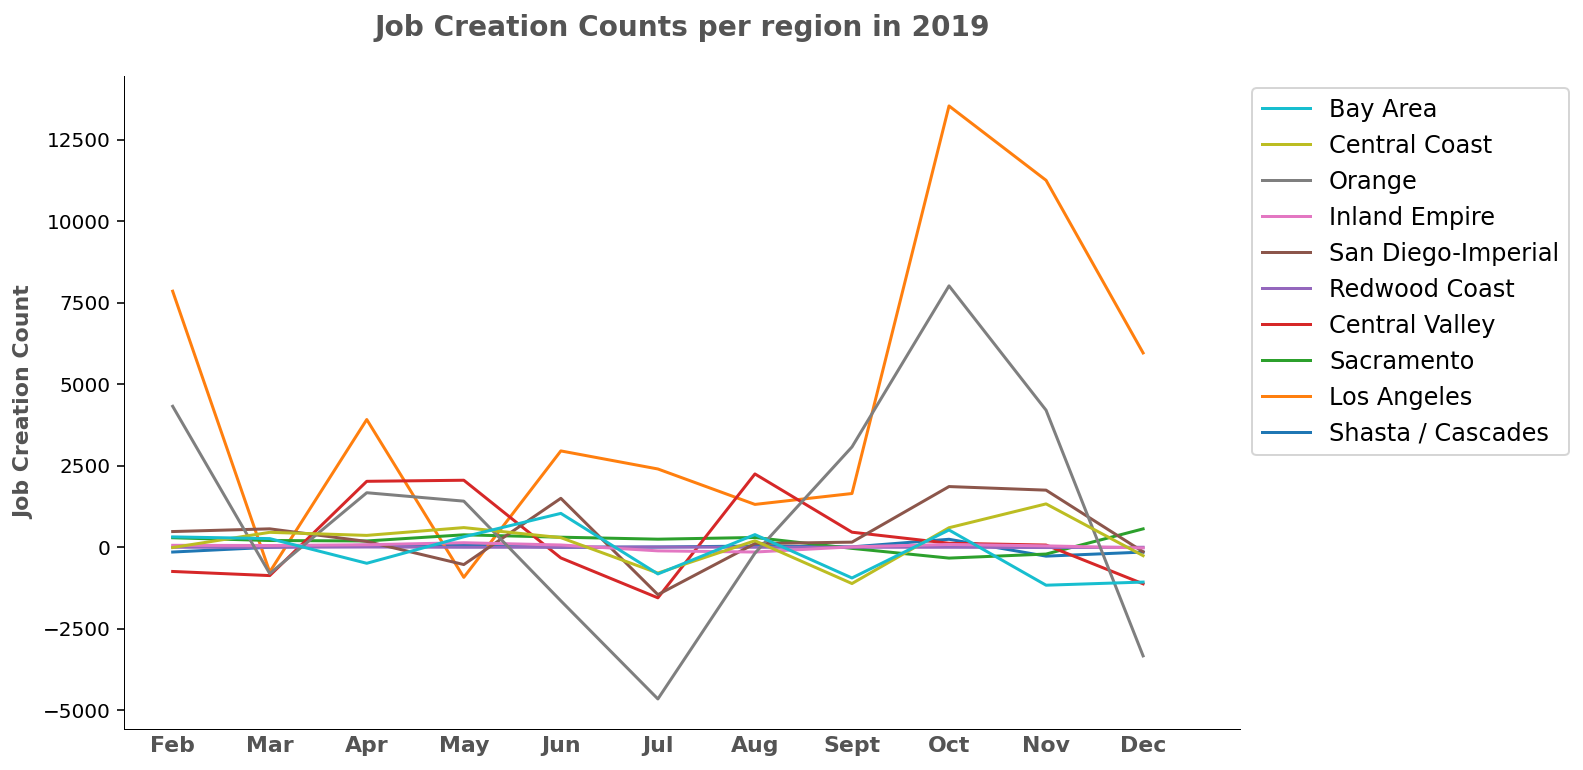

In [213]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(shasta_jc['Job Creation'].values, label='Shasta / Cascades')
ax.plot(la_jc['Job Creation'].values, label='Los Angeles')
ax.plot(sac_jc['Job Creation'].values, label='Sacramento')
ax.plot(cv_jc['Job Creation'].values, label='Central Valley')
ax.plot(rc_jc['Job Creation'].values, label='Redwood Coast')
ax.plot(sd_jc['Job Creation'].values, label='San Diego-Imperial')
ax.plot(ie_jc['Job Creation'].values, label='Inland Empire')
ax.plot(orange_jc['Job Creation'].values, label='Orange')
ax.plot(cc_jc['Job Creation'].values, label='Central Coast')
ax.plot(bay_jc['Job Creation'].values, label='Bay Area')

ax.set_xticklabels(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                   fontsize=11, weight='bold', color = '#545454')
ax.set_title('Job Creation Counts per region in 2019', fontsize=14, weight='bold', pad=20, color='#545454')

plt.xticks(np.arange(0, 12, 1.0))
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylabel('Job Creation Count', fontsize=11, weight='bold', color='#545454')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.show()